In [12]:
import sys,os
from datetime import datetime
from pathlib import Path
import sqlite3
import pandas as pd
import numpy as np
import backtrader as bt # 导入 Backtrader
import akshare as ak
# import backtrader.indicators as btind # 导入策略分析模块
# import backtrader.feeds as btfeeds # 导入数据模块

# 快速连接数据库
class fast_db_conn:
    def __init__(self,db_path):
        self._db = db_path
    def __enter__(self):
        self._conn = sqlite3.connect(self._db)
        print("打开连接 {}".format(self._db))
        return self._conn
    def __exit__(self, exc_type, exc_val, exc_tb):
        self._conn.commit()
        self._conn.close()
        print("关闭连接 {}".format(self._db))


In [18]:
# 声明路径
cur_path = Path(r'.')
print("当前路径为 {}".format(cur_path.resolve()))
gitee_path = cur_path / Path(r'./../../..')    # D:/gitee
db_file_path = gitee_path / Path(r'./finance/db')     # D:/gitee/db
db_file_path = Path(r'D:\gitee\finance\db')  # backtrader项目下先写死
print("数据路径为 {}".format(db_file_path.resolve()))

当前路径为 D:\github\backtrader\playGround\jupyterFile\bt
数据路径为 D:\gitee\finance\db


In [19]:
# sql 语句
sql = {}
sql['simple-data'] = """
    select date,code,name,open,high,low,close from stock_all_221102 where date < '{end_date}' and date >= '{start_date}'
""".strip()

sql['data_spot'] = """
    select * from stock_spot 
""".strip()

sql['data_hfq'] = """
    select * from stock_hfq
""".strip()

# 取22年数据
dbname = [
    'em_stock_2022_1.db',
    'em_stock_2022_2.db',
    'em_stock_2022_3.db',
    'em_stock_2022_4.db',
]

dbpath = db_file_path / Path(dbname[0])
dbpath.resolve()

WindowsPath('D:/gitee/finance/db/em_stock_2022_1.db')

In [21]:
stock_hfq = []
# 读取数据
for i,db in enumerate(dbname):
    with fast_db_conn((db_file_path / Path(db)).resolve()) as c:
        data = pd.read_sql(sql=sql['data_hfq'], con = c, parse_dates=['d'])
        print('{}  {}'.format(datetime.now(),data.shape))
        stock_hfq.append(data)

data = pd.concat(stock_hfq, ignore_index=True)
data.head()

打开连接 D:\gitee\finance\db\em_stock_2022_1.db
2023-01-24 18:24:49.305272  (274032, 13)
关闭连接 D:\gitee\finance\db\em_stock_2022_1.db
打开连接 D:\gitee\finance\db\em_stock_2022_2.db
2023-01-24 18:24:50.559730  (282131, 13)
关闭连接 D:\gitee\finance\db\em_stock_2022_2.db
打开连接 D:\gitee\finance\db\em_stock_2022_3.db
2023-01-24 18:24:52.002367  (316312, 13)
关闭连接 D:\gitee\finance\db\em_stock_2022_3.db
打开连接 D:\gitee\finance\db\em_stock_2022_4.db
2023-01-24 18:24:53.397262  (299536, 13)
关闭连接 D:\gitee\finance\db\em_stock_2022_4.db


,d,open,close,high,low,volume,price_volume,amplitude,p_change,price_change,turnover,code,record_date
0,2022-01-04,45.43,45.70,46.58,45.19,206882,397126992.0,3.08,1.20,0.54,4.86,002222,2022-11-19
1,2022-01-05,45.23,43.68,45.55,42.73,276311,506863760.0,6.17,-4.42,-2.02,6.49,002222,2022-11-19
2,2022-01-06,43.50,43.54,43.84,42.62,128472,232326894.0,2.79,-0.32,-0.14,3.02,002222,2022-11-19
3,2022-01-07,43.72,42.51,44.24,42.40,151622,272725584.0,4.23,-2.37,-1.03,3.56,002222,2022-11-19
4,2022-01-10,42.62,43.36,44.53,42.13,175901,319923328.0,5.65,2.00,0.85,4.13,002222,2022-11-19


In [22]:
# 读取沪深300
# in_300 = ak.index_stock_cons_csindex(symbol="000300")["成分券代码"].unique()
in_300 = ['600031', '300763', '600989', '300782', '601698', '601236',
       '002064', '000876', '601088', '601628', '601988', '003816',
       '688036', '688363', '688111', '601658', '601816', '688169',
       '688396', '688005', '000786', '000723', '600745', '002008',
       '002007', '002049', '601898', '601919', '300122', '600918',
       '688599', '688981', '688561', '300896', '300999', '300919',
       '300124', '600183', '600009', '300979', '688303', '688187',
       '601868', '600941', '601998', '601600', '600196', '600426',
       '601899', '002493', '601166', '600999', '300014', '600150',
       '600010', '600690', '600845', '002352', '601857', '601939',
       '002129', '601390', '600837', '600132', '600115', '600104',
       '002202', '300059', '002311', '000938', '600406', '600061',
       '600309', '600460', '600436', '600029', '601336', '300207',
       '002555', '002594', '002602', '601901', '600036', '000776',
       '600089', '600884', '600085', '002601', '000596', '300316',
       '601633', '601669', '000408', '000001', '000002', '000651',
       '000661', '000733', '000858', '002050', '600048', '002236',
       '601111', '000301', '000538', '000568', '601012', '601238',
       '601800', '603993', '000333', '603806', '300347', '603899',
       '603799', '601689', '600958', '002756', '601985', '300529',
       '603986', '601229', '300595', '002841', '601881', '300601',
       '300628', '603659', '002916', '601838', '601360', '603259',
       '300454', '601066', '300760', '300751', '600926', '603185',
       '601615', '300759', '601865', '300769', '688008', '688012',
       '002271', '002475', '601766', '601668', '002304', '601688',
       '000100', '600438', '603290', '603195', '601808', '601288',
       '002001', '601117', '688126', '603392', '688065', '601995',
       '300957', '600018', '600763', '600383', '600588', '600019',
       '600016', '600011', '600674', '002459', '002460', '605117',
       '605499', '600905', '601728', '001289', '000338', '600276',
       '600000', '002466', '601888', '002410', '002180', '002230',
       '601601', '002414', '002179', '601788', '002142', '601009',
       '002074', '600606', '600660', '601877', '300015', '600188',
       '600039', '600900', '600332', '600176', '600600', '600028',
       '600346', '600886', '002252', '601989', '300033', '601186',
       '601318', '600741', '601006', '002120', '601618', '600219',
       '000977', '601818', '002415', '601377', '000800', '002371',
       '002241', '601328', '601169', '000877', '000895', '600547',
       '600015', '600760', '600795', '600111', '600809', '600030',
       '600803', '600362', '600233', '600584', '601799', '000963',
       '600570', '000425', '600585', '000768', '000792', '600519',
       '600887', '600893', '600050', '300223', '002600', '601216',
       '601100', '300274', '000708', '002027', '002032', '601398',
       '300142', '000063', '000069', '000157', '000625', '000725',
       '002648', '002709', '002714', '601225', '603288', '603369',
       '603019', '300408', '002736', '300413', '601021', '000166',
       '300433', '300450', '601211', '300498', '601155', '300496',
       '001979', '601966', '600919', '002812', '002821', '603833',
       '603501', '300661', '601878', '603882', '603260', '600025',
       '002920', '603486', '601138', '300750', '002938', '601319']

In [23]:
df = data.loc[:,['code','d','open','high','low','close','volume']]
df = df[df.code.isin(in_300)]
col_map={"d":"datetime"}
df = df.rename(columns=col_map)
df['openinterest'] = 0

code = df.loc[:,'code'].unique()
st_date = df.datetime.min()
ed_date = df.datetime.max()
print(df.shape)
df.head()

(72540, 8)


,code,datetime,open,high,low,close,volume,openinterest
638,000725,2022-01-04,17.37,17.47,17.24,17.47,5029016,0
639,000725,2022-01-05,17.47,17.69,17.37,17.60,5515826,0
640,000725,2022-01-06,17.53,17.53,17.34,17.40,3731059,0
641,000725,2022-01-07,17.50,17.79,17.47,17.69,6154201,0
642,000725,2022-01-10,17.76,17.92,17.66,17.79,5160839,0


In [24]:
%%time
cerebro = bt.Cerebro()
for c in code:
    temp = df.query(f"code=='{c}'").set_index('datetime').drop(columns=['code'])
    datafeed1 = bt.feeds.PandasData(dataname=temp, fromdate=st_date, todate=ed_date)
    cerebro.adddata(datafeed1, name=c)


CPU times: total: 1.84 s
Wall time: 1.86 s


In [10]:
class maCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=5,  # period for the fast moving average
        pslow=15   # period for the slow moving average
    )
    def log(self, arg):
        print('{} {}'.format(self.datetime.date(), arg))

    def __init__(self):
        sma_5 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma_15 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma_5, sma_15)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position

In [11]:
cerebro.addstrategy(maCross)
startcash = 100000
cerebro.broker.setcash(startcash) 
cerebro.broker.setcommission(commission=0.0003) 
cerebro.addsizer(bt.sizers.FixedSize, stake=100)  #每次固定交易100股
# 返回收益率时序
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='_TimeReturn')
# cerebro.addanalyzer(bt.analyzers.)

In [12]:
%%time
result = cerebro.run()
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash
#打印结果
print(f'期初总资金: {round(startcash,2)}')
print(f'期末总资金: {round(portvalue,2)}')
print(f'净收益: {round(pnl,2)}')

期初总资金: 100000
期末总资金: 99718.36
净收益: -281.64
CPU times: total: 11 s
Wall time: 11.1 s


<AxesSubplot: title={'center': 'return_curve'}>

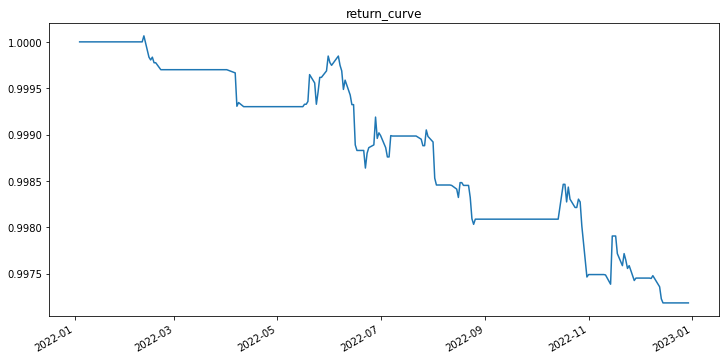

In [18]:
ret = pd.Series(result[0].analyzers._TimeReturn.get_analysis())
(ret.loc['2022-01-01':] + 1).cumprod().plot(figsize=(12,6), title='return_curve')


In [21]:
ann_return = ret.loc['2019-08-30':].mean() * 12 * 100 # 计算年化收益率
ann_vol = ret.loc['2019-08-30':].std() * np.sqrt(12) * 100 # 计算年化波动率

print('年化收益率（非超额）：%.2f%%' % ann_return)
print('年化波动率（非超额）：%.2f%%' % ann_vol)
print('信息比率（非超额）：%.2f' % (ann_return/ann_vol))

年化收益率（非超额）：-0.01%
年化波动率（非超额）：0.03%
信息比率（非超额）：-0.41


In [24]:
# ret = pd.Series(result[0].analyzers._TimeReturn.get_analysis())
r1 = result[0]

In [3]:
# fund_etf_category_sina_df = ak.fund_etf_category_sina(symbol="ETF基金")
fund_etf_category_sina_df = ak.fund_etf_spot_em()
fund_etf_category_sina_df

,代码,名称,最新价,涨跌额,涨跌幅,成交量,成交额,开盘价,最高价,最低价,昨收,换手率,流通市值,总市值
0,513360,教育ETF,0.603,0.026,4.51,3975877.0,2.364366e+08,0.585,0.603,0.584,0.577,50.70,472880984,472880984
1,511980,现金添富ETF,104.238,3.920,3.91,557.0,5.646990e+06,100.371,104.878,100.371,100.318,20.16,28769688,28769688
2,159881,有色60ETF,1.128,0.040,3.68,400179.0,4.482873e+07,1.088,1.129,1.086,1.088,34.13,132257530,132257530
3,516650,有色50ETF,1.123,0.039,3.60,46710.0,5.204135e+06,1.089,1.127,1.088,1.084,11.26,46564970,46564970
4,159713,稀土ETF,0.854,0.029,3.52,541473.0,4.574675e+07,0.825,0.854,0.825,0.825,16.10,287161818,287161818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,516930,生物科技ETF基金,0.701,-0.005,-0.71,9100.0,6.432640e+05,0.706,0.712,0.701,0.706,1.07,59682860,59682860
733,159859,生物医药ETF,0.661,-0.005,-0.75,457674.0,3.036597e+07,0.665,0.674,0.660,0.666,2.03,1493489872,1493489872
734,159643,疫苗ETF,1.033,-0.008,-0.77,449738.0,4.659726e+07,1.041,1.049,1.032,1.041,44.36,104736507,104736507
735,516820,医疗创新ETF,0.593,-0.005,-0.84,506172.0,3.029590e+07,0.605,0.605,0.593,0.598,3.28,914059214,914059214


In [4]:
fund_etf_fund_daily_em_df = ak.fund_etf_fund_daily_em()
fund_etf_fund_daily_em_df

,基金代码,基金简称,类型,2023-01-20-单位净值,2023-01-20-累计净值,2023-01-19-单位净值,2023-01-19-累计净值,增长值,增长率,市价,折价率
0,511010,国泰上证5年期国债ETF行情,债券型-长债,128.8040,1.3010,128.8180,1.3010,-0.0140,-0.01%,128.8540,-0.04%
1,511260,国泰上证10年期国债ETF行情,债券型-长债,119.0630,1.1910,119.1460,1.1910,-0.0830,-0.07%,118.9690,0.08%
2,159972,鹏华中证5年地债ETF行情,债券型-长债,112.7516,1.1297,112.7589,1.1298,-0.0073,-0.01%,112.3550,0.35%
3,511270,海富通上证10年期ETF行情,债券型-长债,108.3260,1.2140,108.4196,1.2149,-0.0936,-0.09%,107.4490,0.81%
4,511020,平安中证5-10年国债活跃券ETF行情,债券型-长债,106.7425,1.1204,106.7751,1.1208,-0.0326,-0.03%,106.7010,0.04%
...,...,...,...,...,...,...,...,...,...,...,...
731,513220,招商中证全球中国互联网ETF(QDII)行情,QDII,---,---,1.0203,1.0203,---,---,1.0420,---
732,159632,华安纳斯达克100ETF(QDII)行情,QDII,---,---,0.8856,0.8856,---,---,0.8950,---
733,159612,国泰标普500(QDII-ETF)行情,QDII,---,---,0.9862,0.9862,---,---,0.9930,---
734,159655,华夏标普500ETF(QDII)行情,QDII,---,---,0.9588,0.9588,---,---,0.9640,---


In [9]:
fund_etf_category_sina_df.query(f"代码=='510630'")


,代码,名称,最新价,涨跌额,涨跌幅,成交量,成交额,开盘价,最高价,最低价,昨收,换手率,流通市值,总市值
736,510630,消费30ETF,1.233,-0.013,-1.04,191792.0,23779141.0,1.243,1.255,1.231,1.246,5.32,444325734,444325734


In [10]:
fund_etf_fund_daily_em_df.query(f"基金代码=='510630'")

,基金代码,基金简称,类型,2023-01-20-单位净值,2023-01-20-累计净值,2023-01-19-单位净值,2023-01-19-累计净值,增长值,增长率,市价,折价率
180,510630,华夏消费ETF行情,指数型-股票,1.2334,4.9336,1.2428,4.9712,-0.0094,-0.76%,1.2330,0.03%


In [118]:
cerebro = bt.Cerebro()
# 添加数据到datafeed
for c in code[:5]:
    temp = df.query(f"code=='{c}'").set_index('datetime').drop(columns=['code'])
    datafeed1 = bt.feeds.PandasData(dataname=temp, fromdate=st_date, todate=ed_date)
    cerebro.adddata(datafeed1, name=c)
    
class TestStrategy1(bt.Strategy):
    def __init__(self):
        self.count = 0 # 用于计算 next 的循环次数
        # 打印数据集和数据集对应的名称
        print("------------- init 中的索引位置-------------")
        print("股票code为 ", self.data1._name)
        print("0 索引：",'datetime',self.data1.lines.datetime.date(0), 'close',self.data1.lines.close[0])
        print("-1 索引：",'datetime',self.data1.lines.datetime.date(-1),'close', self.data1.lines.close[-1])
        print("-2 索引",'datetime', self.data1.lines.datetime.date(-2),'close', self.data1.lines.close[-2])
        print("1 索引：",'datetime',self.data1.lines.datetime.date(1),'close', self.data1.lines.close[1])
        print("2 索引",'datetime', self.data1.lines.datetime.date(2),'close', self.data1.lines.close[2])
        print("从 0 开始往前取3天的收盘价：", self.data1.lines.close.get(ago=0, size=3))
        print("从-1开始往前取3天的收盘价：", self.data1.lines.close.get(ago=-1, size=3))
        print("从-2开始往前取3天的收盘价：", self.data1.lines.close.get(ago=-2, size=3))
        print("line的总长度：", self.data1.buflen())
        
    def next(self):
        print(f"------------- next 的第{self.count+1}次循环 --------------")
        print("当前时点（今日）：",'datetime',self.data1.lines.datetime.date(0),'close', self.data1.lines.close[0])
        print("往前推1天（昨日）：",'datetime',self.data1.lines.datetime.date(-1),'close', self.data1.lines.close[-1])
        print("往前推2天（前日）", 'datetime',self.data1.lines.datetime.date(-2),'close', self.data1.lines.close[-2])
        print("前日、昨日、今日的收盘价：", self.data1.lines.close.get(ago=0, size=3))
        print("往后推1天（明日）：",'datetime',self.data1.lines.datetime.date(1),'close', self.data1.lines.close[1])
        print("往后推2天（明后日）", 'datetime',self.data1.lines.datetime.date(2),'close', self.data1.lines.close[2])
        print("已处理的数据点：", len(self.data1))
        print("line的总长度：", self.data0.buflen())
        self.count += 1

cerebro.addstrategy(TestStrategy1)
rasult = cerebro.run()